In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset in a python environment 

In [60]:
df = pd.read_csv('/content/employee.csv')
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


**There are 2 null values in age, income and gender respectively**

In [62]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# Resetting the index as name 

In [63]:
DF = df.set_index('name')
DF.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# Selecting rows for specific names Jack Morgan and Josh wills

In [64]:
DF.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# Displaying employees who have more than 700 performance score

In [65]:
DF.loc[DF['performance_score'] > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Displaying employees who have more than 500 and less than 700 performance score


In [66]:
DF.loc[(DF['performance_score'] > 500) & (DF['performance_score'] <700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# Checking and handling missing values in the dataset

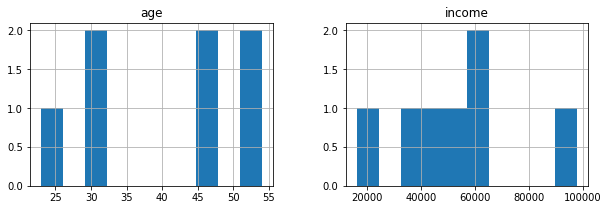

In [67]:
freqgraph = DF.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,3))
plt.show()

In [68]:
for i in ['age', 'income',]:
  DF[i]= DF[i].fillna(DF[i].median())
  

In [69]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9 non-null      float64
 1   income             9 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 804.0+ bytes


In [70]:
DF.isnull()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,False,False,True,False,False,False
S Kumar,False,False,False,False,False,False
Jack Morgan,False,False,False,False,False,False
Ying Chin,False,False,False,False,False,False
Dheeraj Patel,False,False,False,False,False,False
Satyam Sharma,False,False,True,False,False,False
James Authur,False,False,False,False,False,False
Josh Wills,False,False,False,False,False,False
Leo Duck,False,False,False,False,False,False


# Checking for outliers and handling outliers in performance score using percentiles

In [71]:
Q1 = np.percentile(DF['performance_score'], 25, interpolation = 'midpoint')
Q2 = np.percentile(DF['performance_score'], 50, interpolation = 'midpoint')
Q3 = np.percentile(DF['performance_score'], 75, interpolation = 'midpoint')
print(Q1,Q2,Q3)

556.0 674.0 711.0


In [72]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim,up_lim)


323.5 943.5


In [73]:
outlier = []
for i in DF['performance_score']:
  if((i>up_lim) or (i<low_lim)):
    outlier.append(i)
outlier


[53]

The number 53 is an outlier

In [74]:
ind1 = DF['performance_score']<low_lim
DF.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [75]:
DF.drop(['James Authur'] , inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fc14e012710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc14e018750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc14dfa0790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc14dfa0250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc14e012c90>,
  <matplotlib.lines.Line2D at 0x7fc14e018210>]}

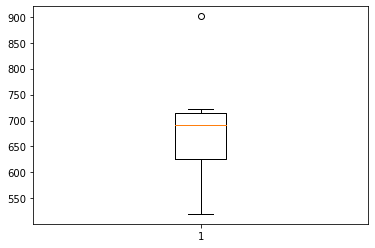

In [76]:
plt.boxplot(DF['performance_score'])

# Checking the gender column and performing dummy encoding

In [77]:
df_dummies = pd.get_dummies(DF, columns=['gender'])
df_dummies.head()

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,0,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
